In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv("SA _Tourism.csv")

In [3]:
df1.head()

,text,Class
0,Happy Sunday! â™¥ï¸\nThanks my lovely @maxsev...,Memories with Family/Friends
1,Last day at the Swedish Nationals!\n~ðŸ‡¸ðŸ‡ª~...,Memories with Family/Friends
2,Looking forward to accompany this awesome swed...,Memories with Family/Friends
3,Look closely and you will notice to of the mos...,Memories with Family/Friends
4,See you in one year Ã…rhus ðŸ’•\n.\nHappy to b...,Memories with Family/Friends


In [4]:
df1['Class'].value_counts()

Fascinating Landscapes           2110
Climate                          1139
Memories with Family/Friends     1025
Local People & Culture            962
Local Cuisine                     755
Outdoor Activities and Events     728
History and Heritage              688
Adventure                         553
Luxurious Indulgence              312
Break Away from Routine           265
Name: Class, dtype: int64

In [5]:
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [6]:
df1.shape

(8537, 2)

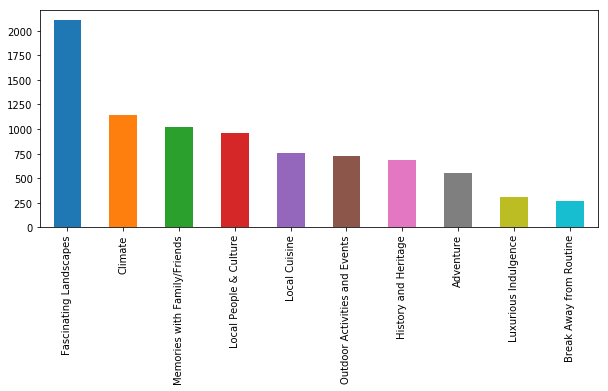

In [7]:
plt.figure(figsize=(10,4))
df1.Class.value_counts().plot(kind='bar')
plt.savefig('barplot.png')

In [8]:
df1=df1[pd.notnull(df1['text'])]
df1.reset_index()

,index,text,Class
0,0,Happy Sunday! â™¥ï¸\nThanks my lovely @maxsev...,Memories with Family/Friends
1,1,Last day at the Swedish Nationals!\n~ðŸ‡¸ðŸ‡ª~...,Memories with Family/Friends
2,2,Looking forward to accompany this awesome swed...,Memories with Family/Friends
3,3,Look closely and you will notice to of the mos...,Memories with Family/Friends
4,4,See you in one year Ã…rhus ðŸ’•\n.\nHappy to b...,Memories with Family/Friends
5,5,Hei! Olemme tÃ¤ssÃ¤ kevÃ¤Ã¤n ja kesÃ¤n mittaan...,Memories with Family/Friends
6,6,"One of our US dealers, Janne â€Fritzâ€ Eksta...",Memories with Family/Friends
7,7,"Kenapa banyak ibu-ibu imigran, pengungsi, asin...",Memories with Family/Friends
8,8,"Kenapa banyak ibu-ibu imigran, pengungsi, asin...",Memories with Family/Friends
9,9,Condition check after travelling and training....,Memories with Family/Friends


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhinav.arun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;#]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [11]:
def clean(text):
    #text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text

In [12]:
df1['cl_text']=df1['text'].apply(lambda x : clean(x))

In [13]:
df1['word_count'] = df1['cl_text'].apply(lambda x: len(str(x).split(" ")))
df1['char_count'] = df1['cl_text'].str.len()

In [14]:
df1=df1[pd.notnull(df1['cl_text'])]

In [15]:
df1=df1.loc[df1['char_count']!=0]

In [16]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df1['avg_word'] = df1['cl_text'].apply(lambda x: avg_word(x))

In [17]:
X=df1.cl_text.values
Y=df1.Class.values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression

## Logistic Regression and TF-IDF 

In [19]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\smlt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\smlt\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [20]:
y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.9244026635330983


## SGD Classifier and CountVectoriser+TF-Idf 

In [21]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.9044261652957305


## Naive Bayes+ CountVectoriser

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.5354484919702311
